=== Daily SPI TR Log Returns (CHF) ===
count    2652.000000
mean       -0.000052
std         0.019378
min        -0.227255
25%        -0.009440
50%        -0.000081
75%         0.009641
max         0.138168
Name: SPI_TR_ret, dtype: float64

=== Weekly SPI TR Log Returns (CHF) ===
count    530.000000
mean       0.000067
std        0.045649
min       -0.373098
25%       -0.020849
50%        0.001664
75%        0.023215
max        0.263743
Name: SPI_TR_ret, dtype: float64


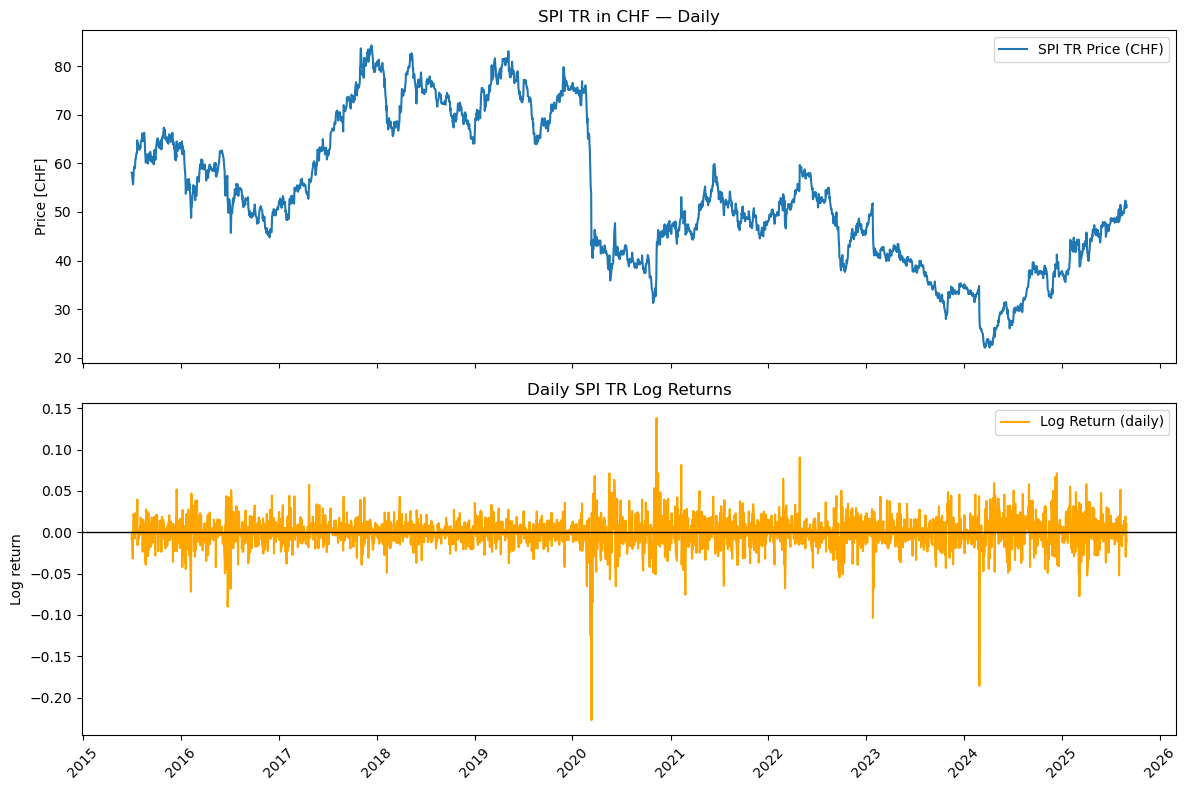

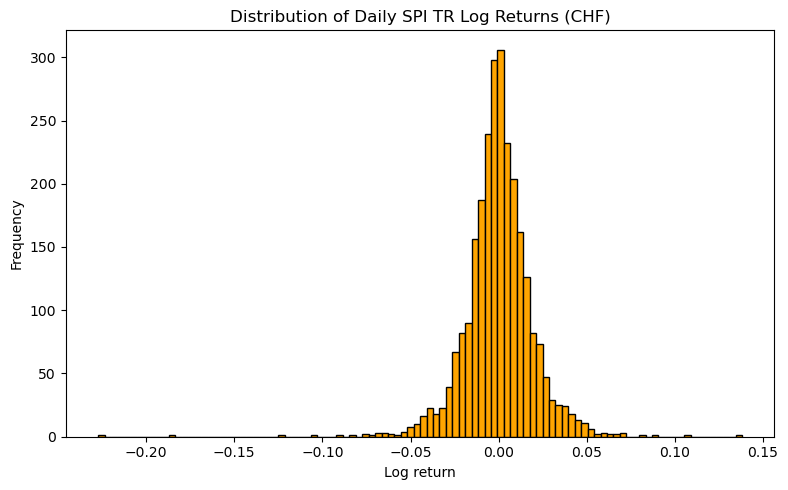

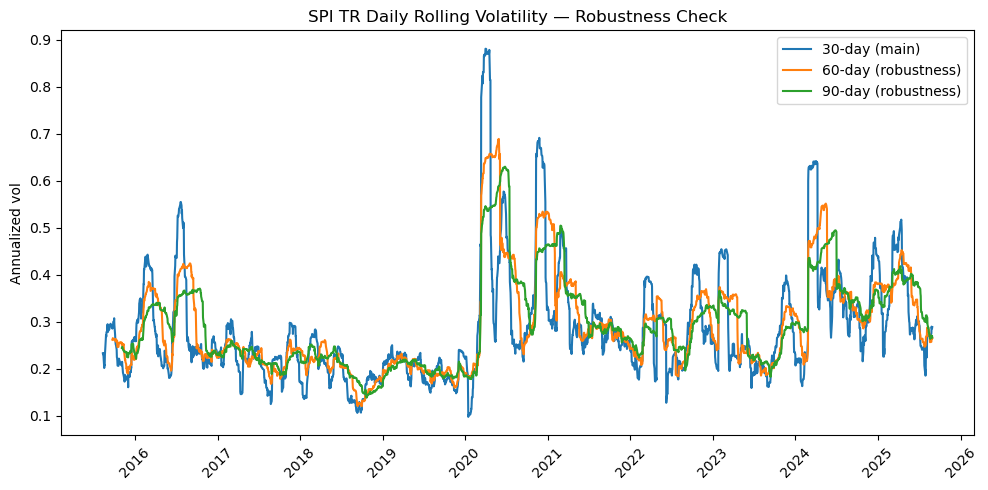

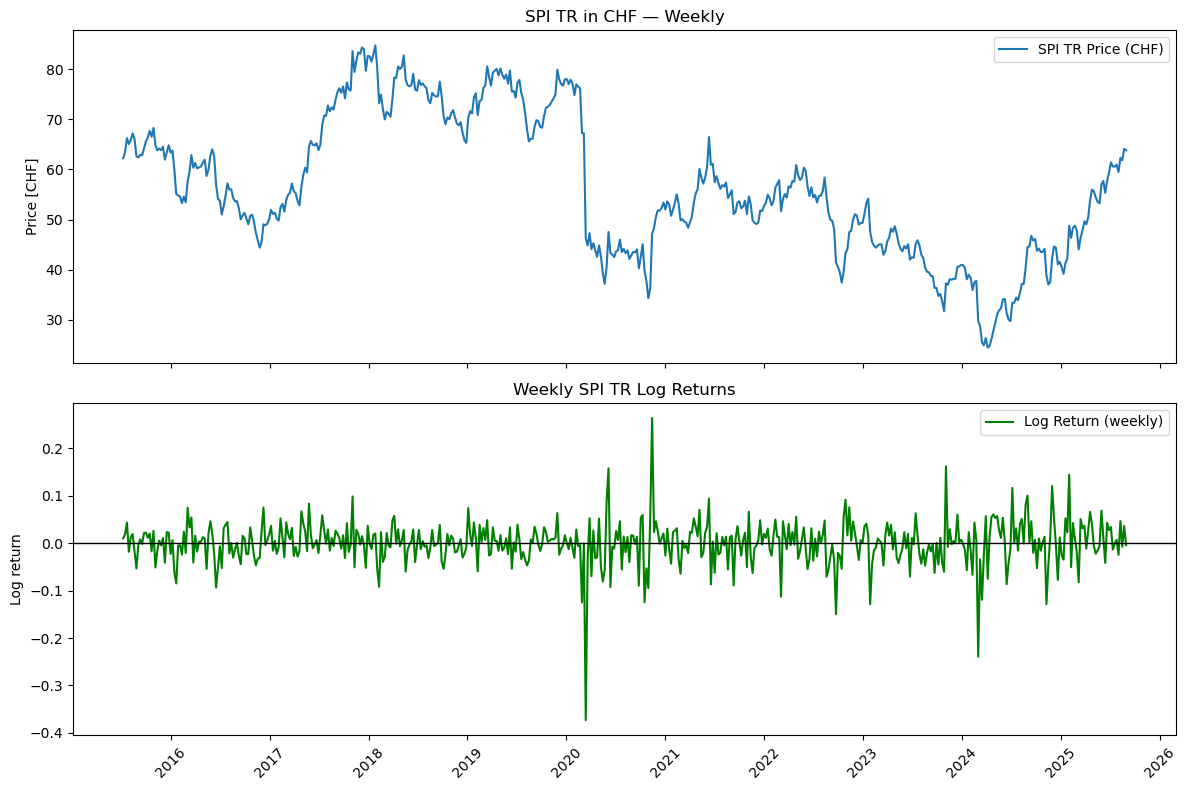

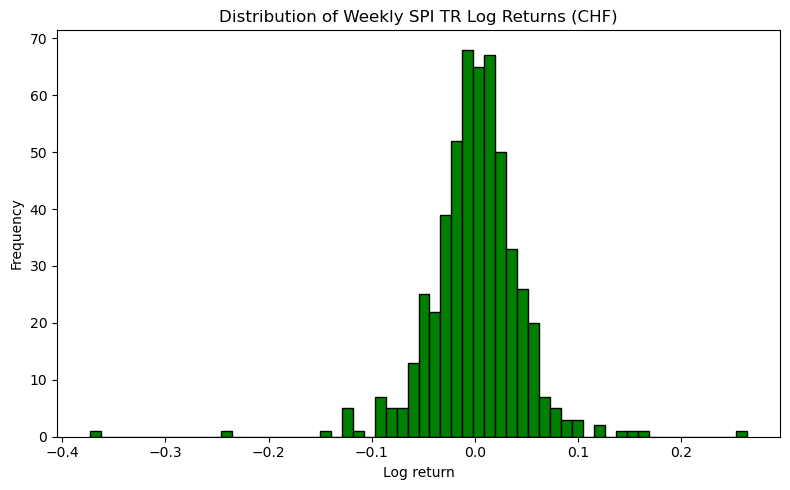

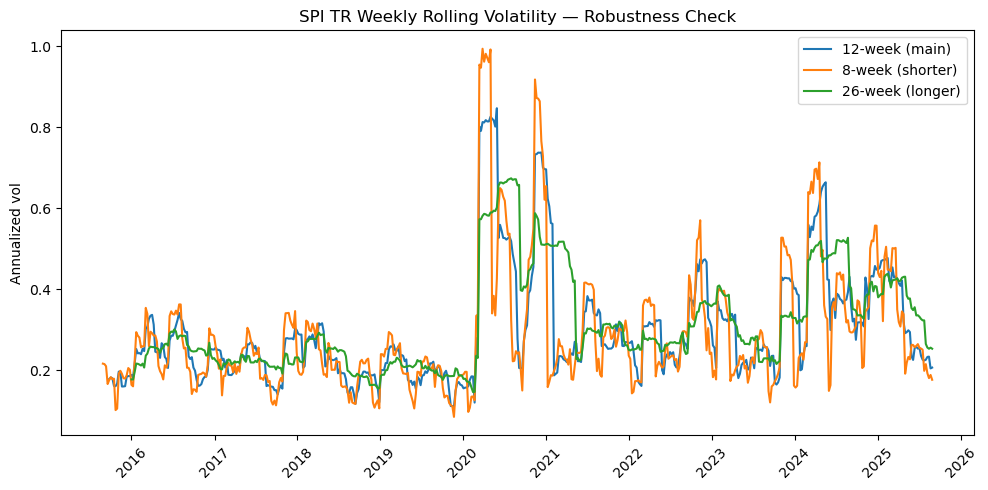

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# === 1) Load saved SPI TR returns ===
path = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\Data_Masterthesis_SPITRCHF_returns.xlsx"
spi_d = pd.read_excel(path, sheet_name="SPITRCHF daily + ret", index_col=0, parse_dates=True)
spi_w = pd.read_excel(path, sheet_name="SPITRCHF weekly + ret", index_col=0, parse_dates=True)

# === 2) Descriptive statistics ===
print("=== Daily SPI TR Log Returns (CHF) ===")
print(spi_d['SPI_TR_ret'].describe())
print("\n=== Weekly SPI TR Log Returns (CHF) ===")
print(spi_w['SPI_TR_ret'].describe())

# === Helper to format x-axis with years ===
def set_year_axis(ax):
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=45)

# === 3) Daily: price & returns ===
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(spi_d.index, spi_d['SPI_TR_CHF_Last'], label='SPI TR Price (CHF)')
ax[0].set_title('SPI TR in CHF — Daily')
ax[0].set_ylabel('Price [CHF]'); ax[0].legend(); set_year_axis(ax[0])

ax[1].plot(spi_d.index, spi_d['SPI_TR_ret'], color='orange', label='Log Return (daily)')
ax[1].axhline(0, color='black', lw=1)
ax[1].set_title('Daily SPI TR Log Returns')
ax[1].set_ylabel('Log return'); ax[1].legend(); set_year_axis(ax[1])
plt.tight_layout(); plt.show()

# === 4) Daily histogram ===
plt.figure(figsize=(8,5))
plt.hist(spi_d['SPI_TR_ret'].dropna(), bins=100, color='orange', edgecolor='black')
plt.title('Distribution of Daily SPI TR Log Returns (CHF)')
plt.xlabel('Log return'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

# === 5) Daily rolling vol (30d main) + robustness (60/90d), annualized √252 ===
spi_d['RollingVol30'] = spi_d['SPI_TR_ret'].rolling(30).std()
spi_d['RollingVol60'] = spi_d['SPI_TR_ret'].rolling(60).std()
spi_d['RollingVol90'] = spi_d['SPI_TR_ret'].rolling(90).std()

plt.figure(figsize=(10,5))
plt.plot(spi_d.index, spi_d['RollingVol30'] * np.sqrt(252), label='30-day (main)')
plt.plot(spi_d.index, spi_d['RollingVol60'] * np.sqrt(252), label='60-day (robustness)')
plt.plot(spi_d.index, spi_d['RollingVol90'] * np.sqrt(252), label='90-day (robustness)')
plt.title('SPI TR Daily Rolling Volatility — Robustness Check')
plt.ylabel('Annualized vol'); plt.legend(); set_year_axis(plt.gca())
plt.tight_layout(); plt.show()

# === 6) Weekly: price & returns ===
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(spi_w.index, spi_w['SPI_TR_CHF_Last'], label='SPI TR Price (CHF)')
ax[0].set_title('SPI TR in CHF — Weekly')
ax[0].set_ylabel('Price [CHF]'); ax[0].legend(); set_year_axis(ax[0])

ax[1].plot(spi_w.index, spi_w['SPI_TR_ret'], color='green', label='Log Return (weekly)')
ax[1].axhline(0, color='black', lw=1)
ax[1].set_title('Weekly SPI TR Log Returns')
ax[1].set_ylabel('Log return'); ax[1].legend(); set_year_axis(ax[1])
plt.tight_layout(); plt.show()

# === 7) Weekly histogram ===
plt.figure(figsize=(8,5))
plt.hist(spi_w['SPI_TR_ret'].dropna(), bins=60, color='green', edgecolor='black')
plt.title('Distribution of Weekly SPI TR Log Returns (CHF)')
plt.xlabel('Log return'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()

# === 8) Weekly rolling vol (12w main) + robustness (8/26w), annualized √52 ===
spi_w['RollingVol12w'] = spi_w['SPI_TR_ret'].rolling(12).std()
spi_w['RollingVol8w']  = spi_w['SPI_TR_ret'].rolling(8).std()
spi_w['RollingVol26w'] = spi_w['SPI_TR_ret'].rolling(26).std()

plt.figure(figsize=(10,5))
plt.plot(spi_w.index, spi_w['RollingVol12w'] * np.sqrt(52), label='12-week (main)')
plt.plot(spi_w.index, spi_w['RollingVol8w']  * np.sqrt(52), label='8-week (shorter)')
plt.plot(spi_w.index, spi_w['RollingVol26w'] * np.sqrt(52), label='26-week (longer)')
plt.title('SPI TR Weekly Rolling Volatility — Robustness Check')
plt.ylabel('Annualized vol'); plt.legend(); set_year_axis(plt.gca())
plt.tight_layout(); plt.show()
